# IO模型比较分析
到目前为止，已经将四个IO Model都介绍完了。

现在回过头来回答最初的那几个问题：blocking和non-blocking的区别在哪，synchronous IO和asynchronous IO的区别在哪。

    先回答最简单的这个：blocking vs non-blocking。前面的介绍中其实已经很明确的说明了这两者的区别。
    调用blocking IO会一直block住对应的进程直到操作完成，而non-blocking IO在kernel还准备数据的情况下会立刻返回。

    再说明synchronous IO和asynchronous IO的区别之前，需要先给出两者的定义。
    Stevens给出的定义（其实是POSIX的定义）是这样子的：
    A synchronous I/O operation causes the requesting process to be blocked until that I/O operationcompletes;
    An asynchronous I/O operation does not cause the requesting process to be blocked; 
    
    两者的区别就在于synchronous IO做”IO operation”的时候会将process阻塞。按照这个定义，四个IO模型可以分为两大类，之前所述的blocking IO，non-blocking IO，IO multiplexing都属于synchronous IO这一类，而 asynchronous I/O后一类 。

    有人可能会说，non-blocking IO并没有被block啊。这里有个非常“狡猾”的地方，定义中所指的”IO operation”是指真实的IO操作，就是例子中的recvfrom这个system call。non-blocking IO在执行recvfrom这个system call的时候，如果kernel的数据没有准备好，这时候不会block进程。
    但是，当kernel中数据准备好的时候，recvfrom会将数据从kernel拷贝到用户内存中，这个时候进程是被block了，在这段时间内，进程是被block的。
    而asynchronous IO则不一样，当进程发起IO 操作之后，就直接返回再也不理睬了，直到kernel发送一个信号，告诉进程说IO完成。在这整个过程中，进程完全没有被block。

各个IO Model的比较如图所示：

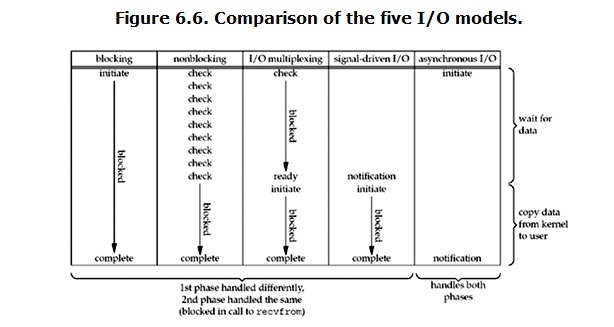

经过上面的介绍，会发现non-blocking IO和asynchronous IO的区别还是很明显的。在non-blocking IO中，虽然进程大部分时间都不会被block，但是它仍然要求进程去主动的check，并且当数据准备完成以后，也需要进程主动的再次调用recvfrom来将数据拷贝到用户内存。而asynchronous IO则完全不同。它就像是用户进程将整个IO操作交给了他人（kernel）完成，然后他人做完后发信号通知。在此期间，用户进程不需要去检查IO操作的状态，也不需要主动的去拷贝数据。